In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
# Prevent line breaks
pd.set_option('display.expand_frame_repr', False) 

In [10]:
# Load the Titanic dataset from a GitHub repository
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)


In [3]:
#few data insight and exploration check
print(titanic_data.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [5]:
# Check the shape of the dataset
print(titanic_data.shape)
# Check the data types of the columns
print(titanic_data.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Summary statistics for numerical features
print(titanic_data.describe().transpose())


             count        mean         std   min       25%       50%    75%       max
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5  891.0000
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0    1.0000
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0    3.0000
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   80.0000
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0    8.0000
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0    6.0000
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0  512.3292


In [7]:
# Summary for categorical features
print(titanic_data.describe(include=['O']).transpose())

         count unique                  top freq
Name       891    891  Dooley, Mr. Patrick    1
Sex        891      2                 male  577
Ticket     891    681               347082    7
Cabin      204    147                   G6    4
Embarked   889      3                    S  644


In [8]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Dealing with misasing values 

In [11]:
# Fill missing Age values with the median
titanic_data.loc[titanic_data["Embarked"].isnull(), "Embarked" ] = titanic_data["Embarked"].mode()[0]
# Fill missing Embarked values with the mode
titanic_data.loc[titanic_data["Age"].isnull(), "Age"] = titanic_data.Age.median()
# Dropping the Cabin column since it has so much NA and doesnt affect the data quality
titanic_data.drop(columns=['Cabin'], inplace=True)

In [12]:
#checking the data now if it contains null again and checking the top dataset
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Create age groups
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ["Child", "Young Adult", "Adult", "Middle Age", "Senior"]
titanic_data["Age_Group"] = pd.cut(titanic_df["Age"], bins = bins, labels = labels)

Survival check

<Figure size 1000x600 with 0 Axes>

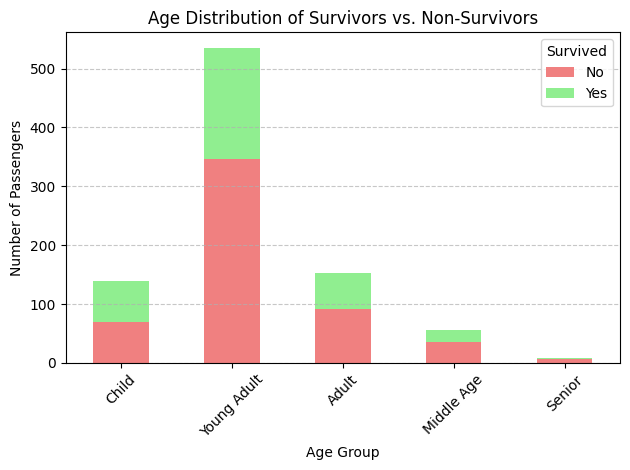

In [32]:
# Count the number of survivors and non-survivors in each age group
age_group_counts = titanic_data.groupby(["Age_Group", "Survived"], observed = False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"])
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.legend(title="Survived", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

In [38]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_Group'],
      dtype='object')

In [41]:
# Calculate survival counts by family size
Family_Survival = titanic_data.groupby("Family_Size")["Survived"].agg(["sum", "count"]).reset_index()
Family_Survival["SurvivalRate"] = Family_Survival["sum"] / Family_Survival["count"]

# Prepare data for the pie chart
Survival_Counts = Family_Survival[["Family_Size", "sum"]].set_index("Family_Size")
Survival_Counts.columns = ["Survived"]

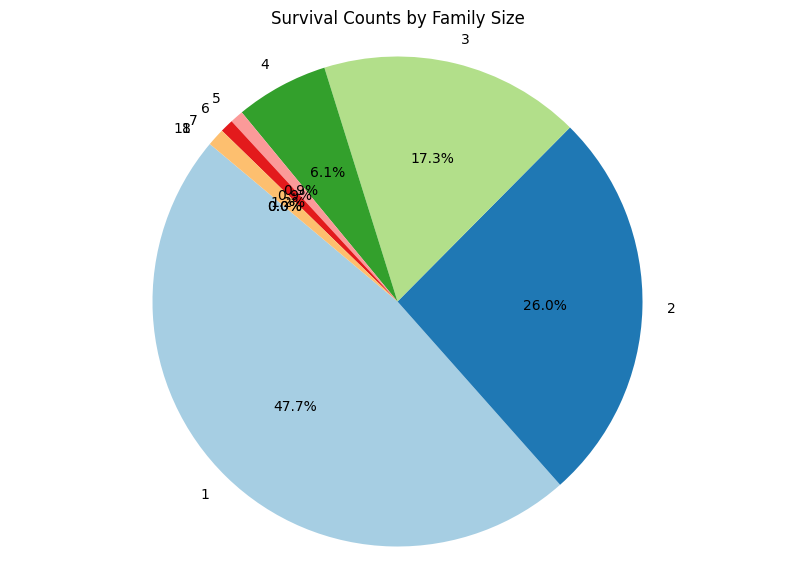

In [44]:
# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(Survival_Counts["Survived"], 
        labels = Survival_Counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)

# Adding a title
plt.title('Survival Counts by Family Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [50]:
# Define the bin edges for fare classes (adjust as needed)
bin_edges = [0, 10, 20, 30, 50, 100, 200, 300]
bin_labels = ['0-10', '10-20', '20-30', '30-50', '50-100', '100-200', '200+']

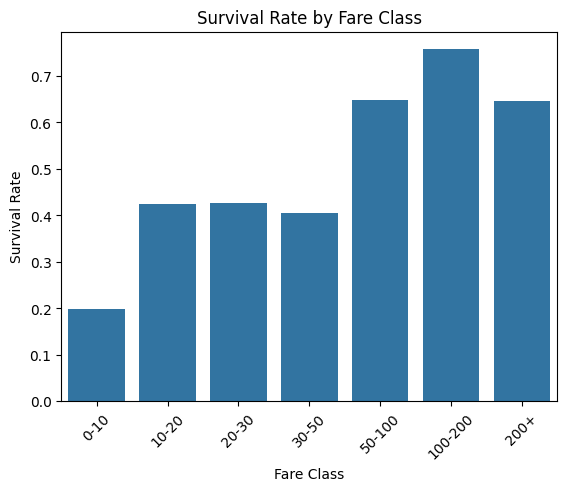

In [53]:
# Create fare class column using pd.cut
titanic_data["Fare_Class"] = pd.cut(titanic_data["Fare"], bins =bin_edges, labels = bin_labels, right = False)

# Calculate survival rate by fare class
Fare_Survival = titanic_data[["Fare_Class", "Survived"]].groupby("Fare_Class", observed=True).mean().reset_index()

# Plotting the survival rate by fare class
sns.barplot(x = "Fare_Class", y ="Survived", data = Fare_Survival)
plt.title("Survival Rate by Fare Class")
plt.ylabel("Survival Rate")
plt.xlabel("Fare Class")
plt.xticks(rotation=45)
plt.show()

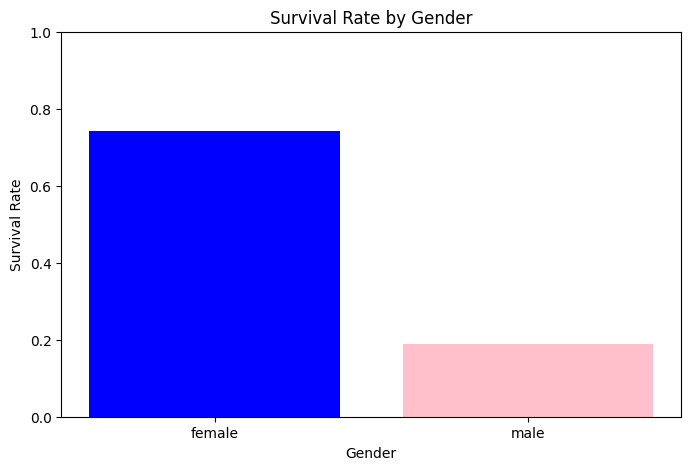

In [57]:
# Calculate survival rates by gender
Gender_Survival = titanic_data.groupby("Sex")["Survived"].mean().reset_index()

# Bar plot for survival rate by gender using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(Gender_Survival["Sex"], Gender_Survival["Survived"], color=['blue', 'pink'])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set y-axis limits to show percentage
plt.show()

In [59]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Family_Size,Fare_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2,50-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,2,50-100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,1,0-10
